In [1]:
###### Hisse senedi fiyatı zaman içinde nasıl değişti?
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Yahoo'dan hisse senedi verilerini okumak için
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# Zaman dalgaları için
from datetime import datetime


# Bu analizde kullanacağımız teknoloji hisseleri
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Veri çekimi için Bitiş ve Başlangıç zamanlarını ayarlama
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-01-24,157.800003,158.509995,156.479996,156.869995,156.869995,48547300,AMAZON
2024-01-25,156.949997,158.509995,154.550003,157.750000,157.750000,43638600,AMAZON
2024-01-26,158.419998,160.720001,157.910004,159.119995,159.119995,51047400,AMAZON
2024-01-29,159.339996,161.289993,158.899994,161.259995,161.259995,45270400,AMAZON
2024-01-30,160.699997,161.729996,158.490005,159.000000,159.000000,45207400,AMAZON
2024-01-31,157.000000,159.009995,154.809998,155.199997,155.199997,50284400,AMAZON
2024-02-01,155.869995,159.759995,155.619995,159.279999,159.279999,76542400,AMAZON
2024-02-02,169.190002,172.500000,167.330002,171.809998,171.809998,117154900,AMAZON
2024-02-05,170.199997,170.550003,167.699997,170.309998,170.309998,55081300,AMAZON


In [36]:
AAPL.describe() # apple özet istatistik

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,176.980755,178.513572,175.703093,177.230119,176.875466,5.739398e+07
std,13.655588,13.508792,13.600797,13.532674,13.696713,1.597223e+07
min,144.380005,146.710007,143.899994,145.309998,144.722946,2.404830e+07
25%,169.347504,170.914997,167.815002,169.657494,168.972069,4.728925e+07
50%,178.150002,179.785004,177.029999,178.500000,178.264549,5.381205e+07
75%,189.100002,189.934998,187.509998,188.785004,188.659035,6.413740e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.282567e+08


In [37]:
AAPL.info() # apple genel bilgi

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-02-06 to 2024-02-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


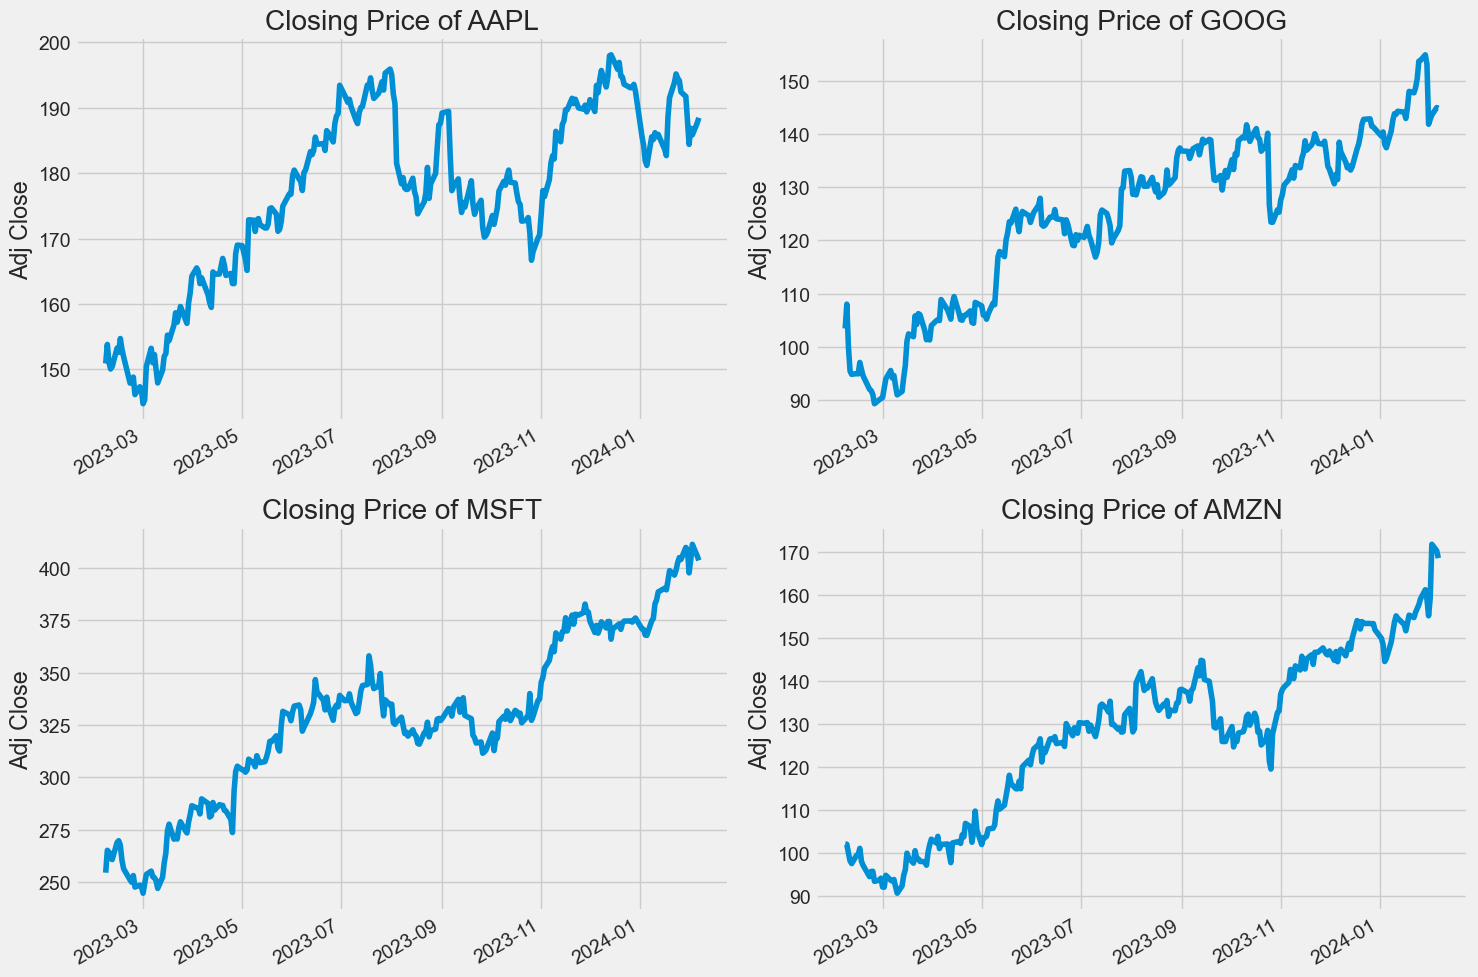

In [38]:
###### Kapanış fiyatı
# Hisse senedi kapanış fiyatının tarihsel görünümünü görelim.
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

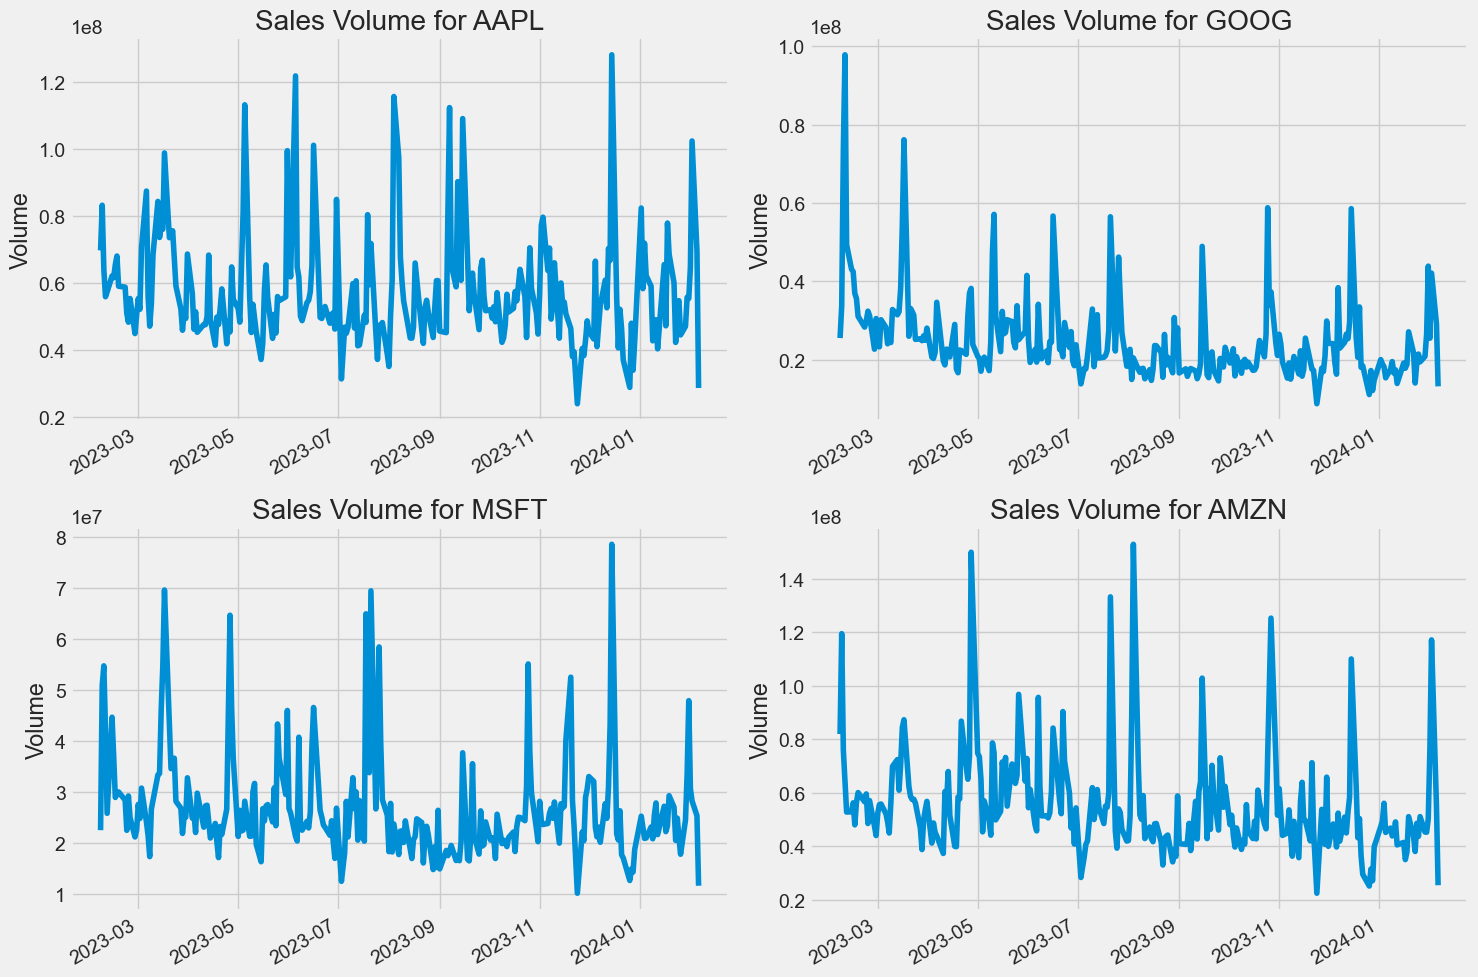

In [39]:
###### Satış Hacmi
# Her gün işlem gören toplam hisse miktarını grafiğe dökelim.
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

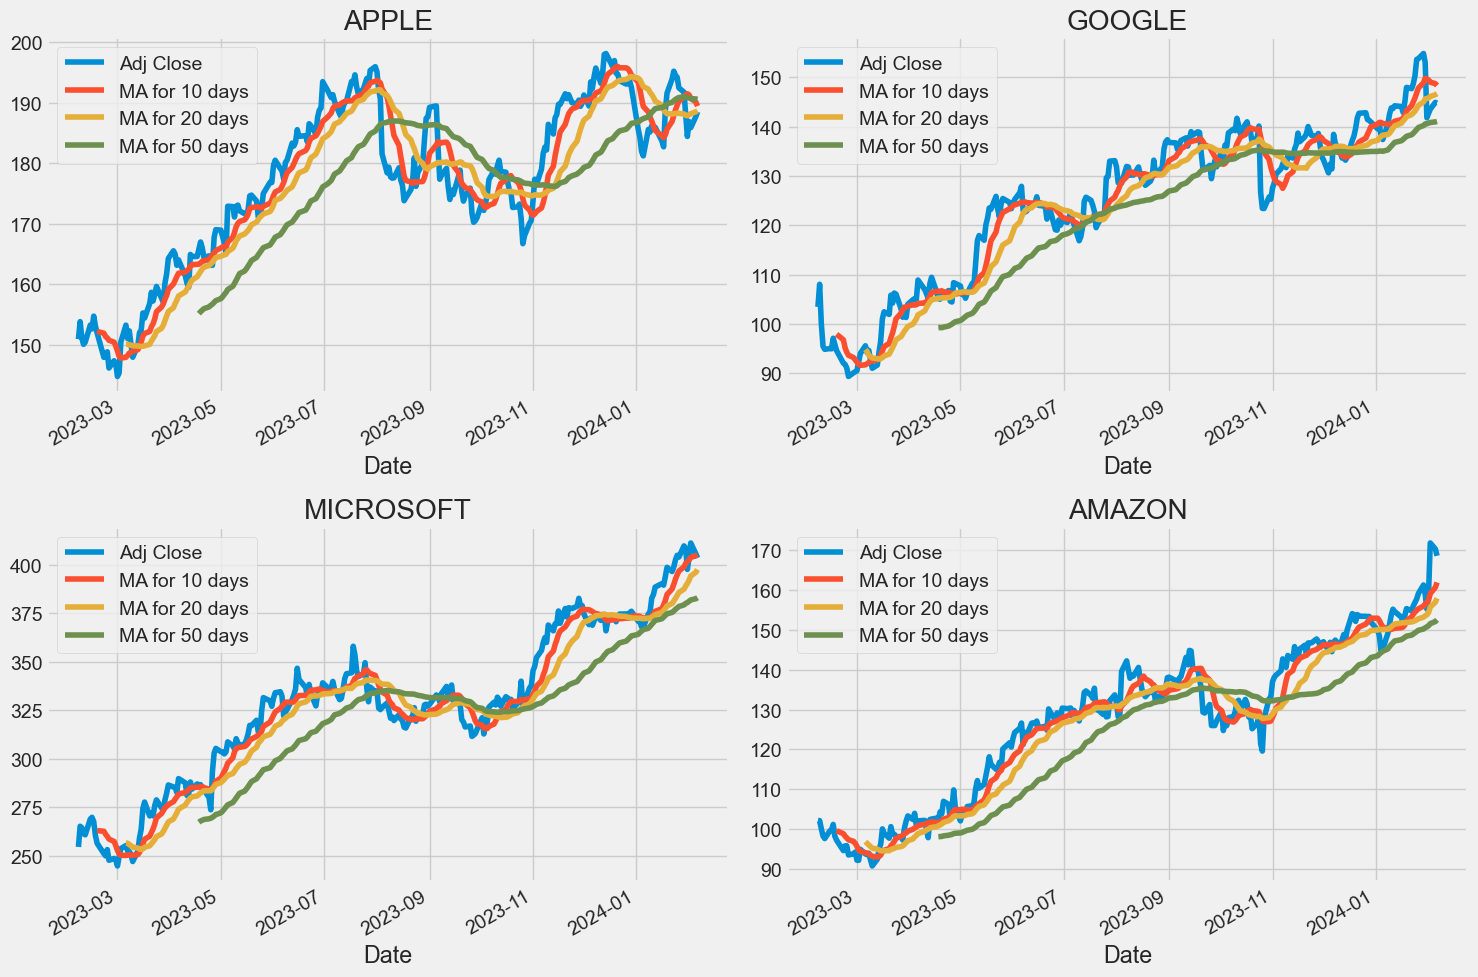

In [40]:
###### Çeşitli hisse senetlerinin hareketli ortalaması nedir?
###### Hareketli ortalama (MA), fiyat verilerini düzleştiren basit bir teknik analiz aracıdır ve sürekli olarak güncellenen 
###### bir ortalama fiyat oluşturur. Ortalama, 10 gün, 20 dakika, 30 hafta gibi belirli bir zaman dilimi boyunca alınır 
###### veya tüccarın seçtiği herhangi bir zaman dilimi boyunca alınır.
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

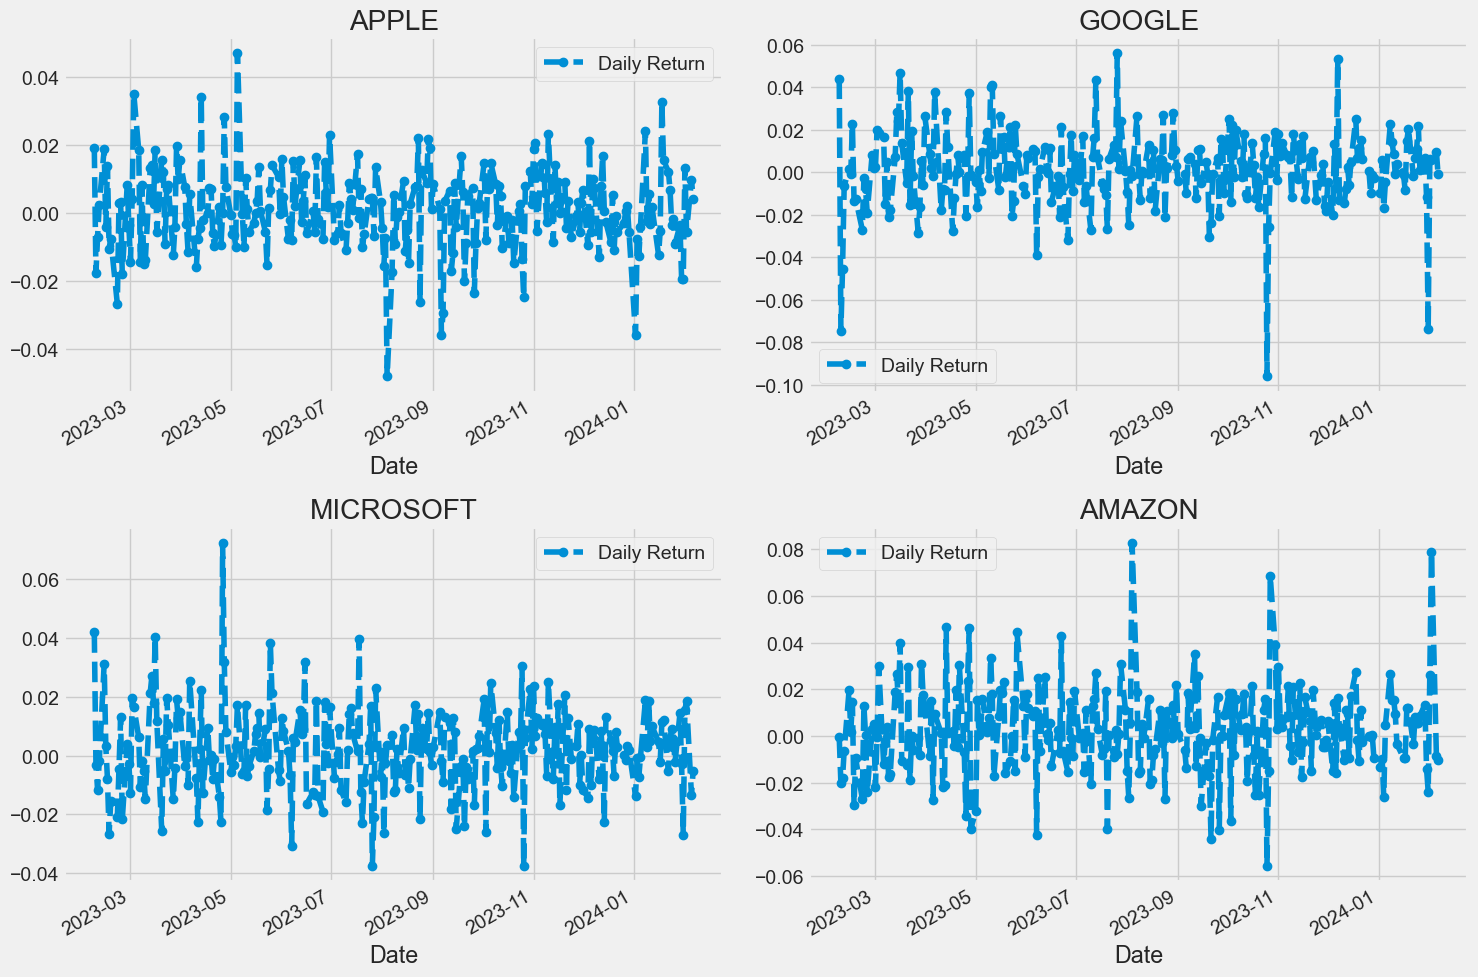

In [41]:
###### Hisseye ait ortalama günlük getiri nedir?
###### Şimdi bir temel analiz yaptık, biraz daha derine inelim. Şimdi hissenin riskini analiz edeceğiz. 
###### Bunun için hissenin günlük değişimlerine daha yakından bakmamız gerekecek ve sadece mutlak değerini değil. 
###### Hadi pandas'ı kullanarak Apple hissesi için günlük getirileri alalım."
# Her gün için yüzde değişimi bulmak için pct_change yöntemini kullanacağız.
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Ardından, günlük getiri yüzdesini grafiğe dökeceğiz.
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

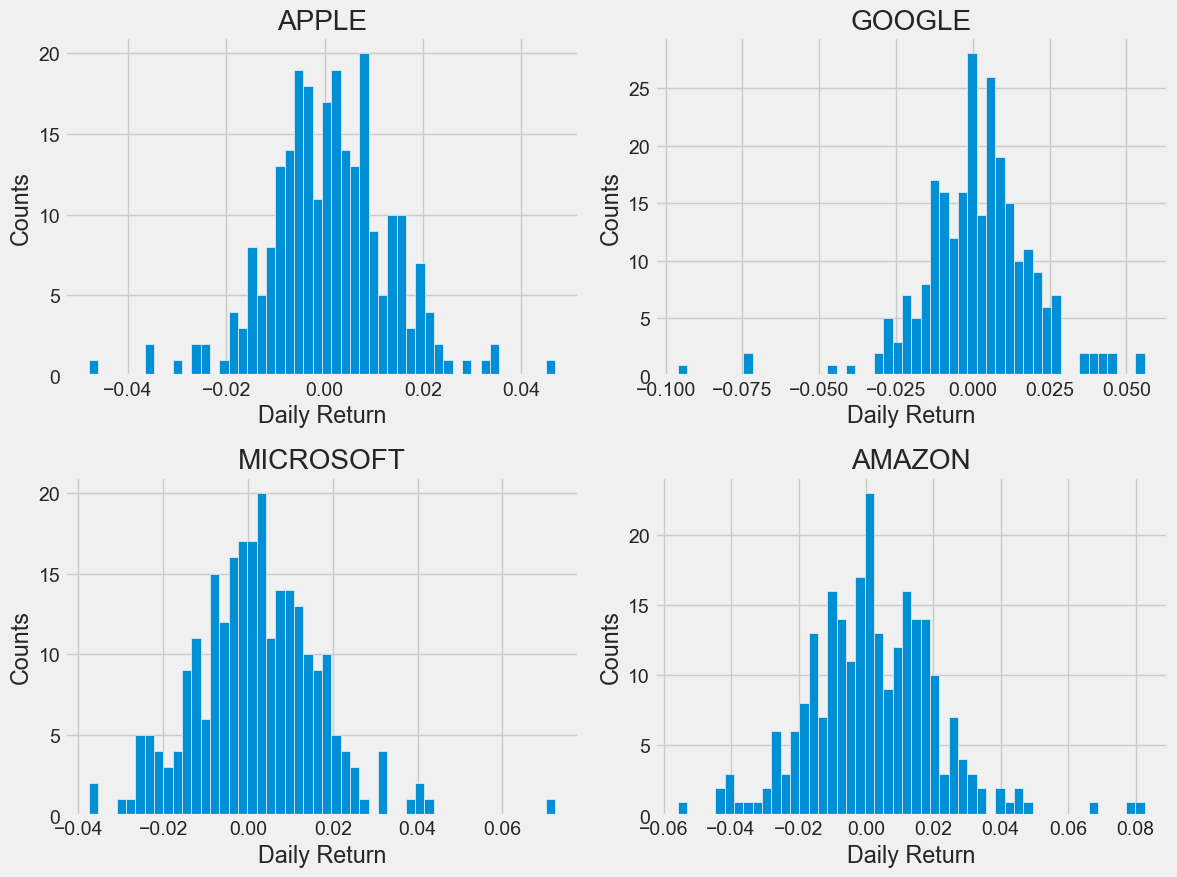

In [42]:
# Şimdi bir histogram kullanarak ortalama günlük getiriye genel bir bakış alalım. 
# Hem bir histogram hem de kde plotunu aynı figürde oluşturmak için seaborn kullanacağız.
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [43]:
###### Değişik hisse senetleri kapanış fiyatları arasındaki korelasyon nedir?
###### Korelasyon, iki değişkenin birbirine göre hareket etme derecesini ölçen bir istatistik olup, 
###### değeri -1,0 ile +1,0 arasında olmalıdır. Korelasyon, ilişkiyi ölçer ancak x'in y'yi mi yoksa tam tersini mi 
###### neden olduğunu - ya da ilişkinin üçüncü bir faktör tarafından mı neden olduğunu göstermez.
###### Peki ya listedeki tüm hisse senetlerinin getirilerini analiz etmek istesek? Hadi, her bir hisse senedi 
###### veri çerçevesinin ['Close'] sütunlarını içeren bir DataFrame oluşturalım.
# Teknoloji hisse senedi listesindeki tüm kapanış fiyatlarını tek bir DataFrame'e ekleyelim.

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Yeni bir teknoloji getirileri DataFrame'i oluşturalım.
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-02-06,NaN,NaN,NaN,NaN
2023-02-07,0.019245,-0.000685,0.044167,0.042022
2023-02-08,-0.017653,-0.020174,-0.074417,-0.003102
2023-02-09,-0.006912,-0.018091,-0.045400,-0.011660
2023-02-10,0.002456,-0.006413,-0.006285,-0.001972


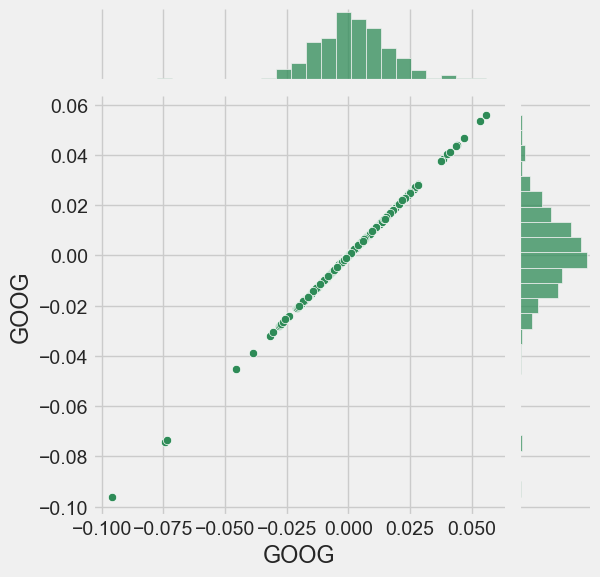

In [44]:
###### Şimdi iki hisse senedinin günlük yüzde getirisini karşılaştırarak ne kadar korelasyonlu olduğunu kontrol edebiliriz. 
###### İlk olarak, bir hisse senedinin kendisiyle karşılaştırıldığını görelim.
# Google'ın kendisiyle karşılaştırılması, mükemmel bir doğrusal ilişki gösterecektir.
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

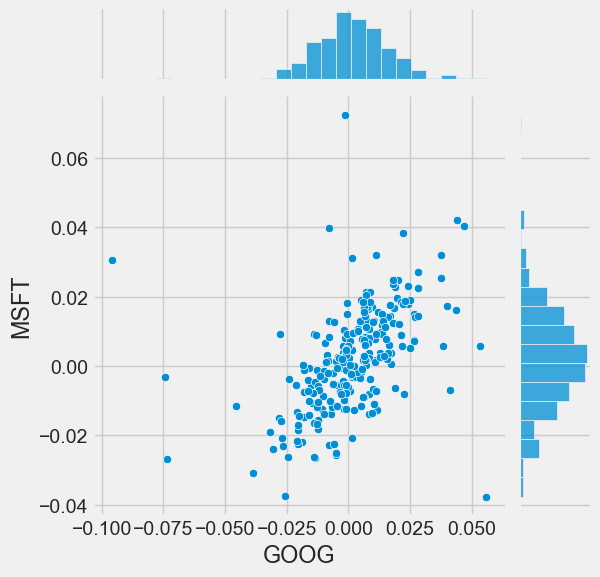

In [45]:
# Google ve Microsoft'un günlük getirilerini karşılaştırmak için joinplot kullanacağız.
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


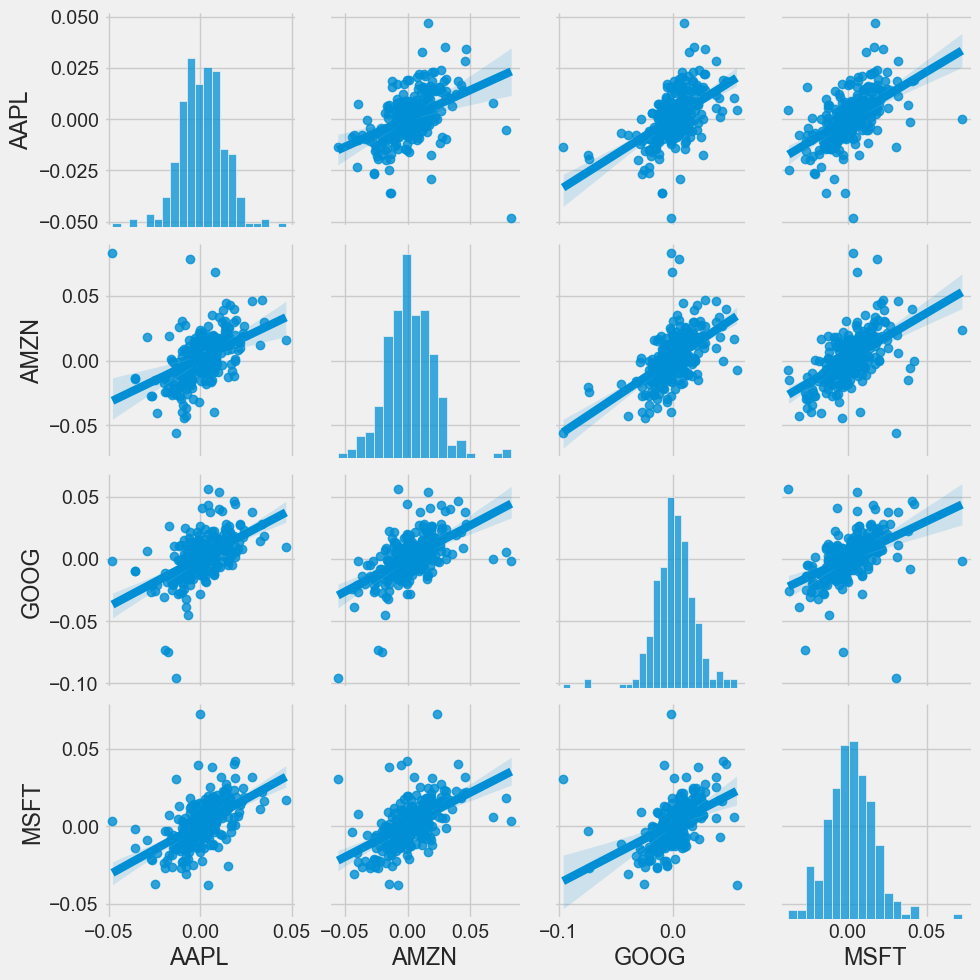

In [46]:
###### Şimdi iki hisse senedi birbiriyle mükemmel (ve pozitif) şekilde korelasyonlu ise, günlük getiri değerleri arasında 
###### doğrusal bir ilişki oluşmalıdır.
###### Seaborn ve pandas, teknoloji hisse senedi simgelerimiz listesindeki her olası kombinasyon için bu karşılaştırma 
###### analizini tekrarlamayı çok kolaylaştırır. Bu grafiği otomatik olarak oluşturmak için sns.pairplot() kullanabiliriz.
# Sadece DataFrame'imiz üzerinde pairplot'u çağırarak otomatik bir görsel analiz yapabiliriz.
# Tüm karşılaştırmalar

sns.pairplot(tech_rets, kind='reg')

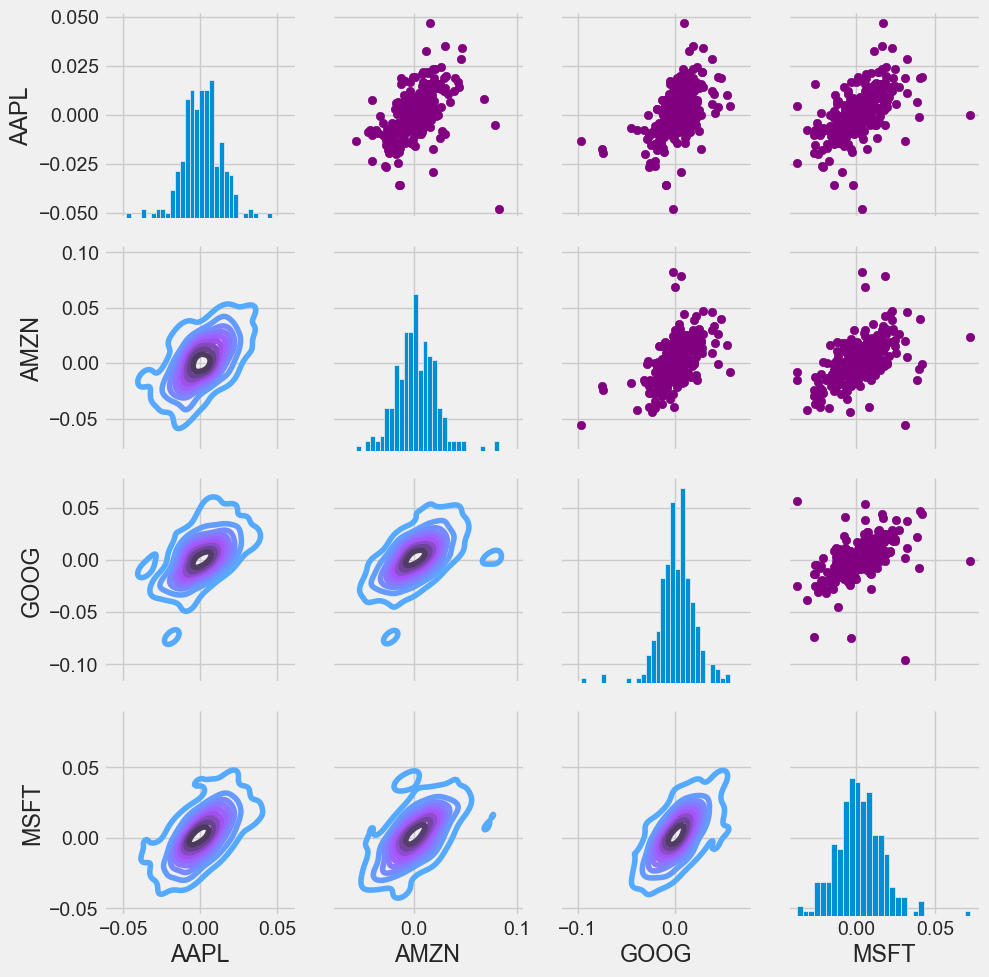

In [47]:
###### Yukarıda, tüm hisse senetleri arasındaki günlük getiriler üzerindeki tüm ilişkileri görebiliriz.
###### Hızlı bir bakış, Google ve Amazon günlük getirileri arasında ilginç bir korelasyon olduğunu göstermektedir. 
###### Bu bireysel karşılaştırmayı incelemek ilginç olabilir.
###### Sadece sns.pairplot() çağırmanın basitliği harika olsa da, figür üzerinde tam kontrol sağlamak için sns.PairGrid() 
###### kullanabiliriz, bu da hangi tür grafiklerin diyagonal, üst üçgen ve alt üçgende yer alacağını içerir. 
###### Aşağıda, bu sonucu elde etmek için seaborn'un tam gücünden yararlanmanın bir örneği bulunmaktadır.
# returns_fig adında bir figür oluşturalım, DataFrame üzerinde PairPLot'u çağıralım.
return_fig = sns.PairGrid(tech_rets.dropna())

# map_upper kullanarak, üst üçgenin nasıl görüneceğini belirleyebiliriz.
return_fig.map_upper(plt.scatter, color='purple')

# Ayrıca, figürde alt üçgeni de tanımlayabiliriz, grafik türünü (kde) veya renk haritasını (MaviMor) içerecek şekilde.
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Son olarak, diyagonali, günlük getirinin bir dizi histogram grafiği olarak tanımlayalım.
return_fig.map_diag(plt.hist, bins=30)

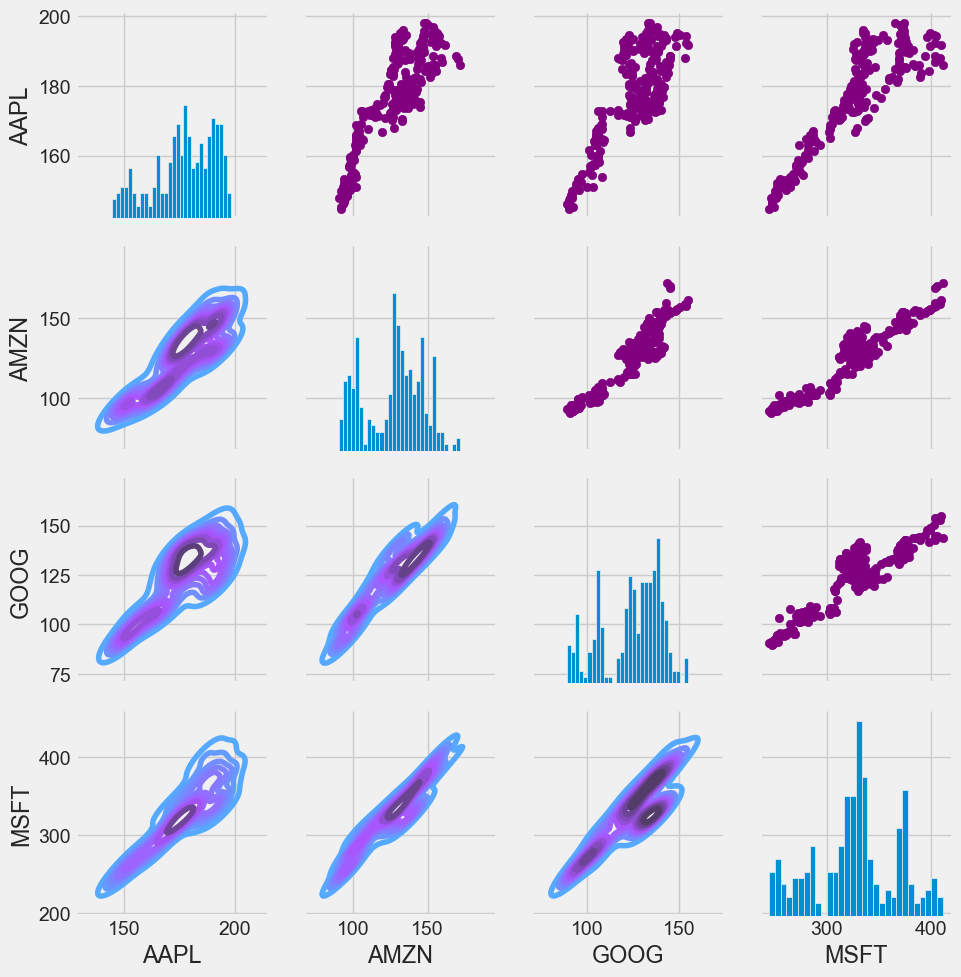

In [48]:
# Yine returns_fig adında bir figür oluşturalım, DataFrame üzerinde PairPlot'u çağıralım.
returns_fig = sns.PairGrid(closing_df)

# map_upper kullanarak, üst üçgenin nasıl görüneceğini belirleyebiliriz.
returns_fig.map_upper(plt.scatter,color='purple')

# Ayrıca yine, figürde alt üçgeni de tanımlayabiliriz, grafik türünü (kde) veya renk haritasını (mavimor) içerecek şekilde.
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Son olarak yine, diyagonali, günlük getirinin bir dizi histogram grafiği olarak tanımlayalım.
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

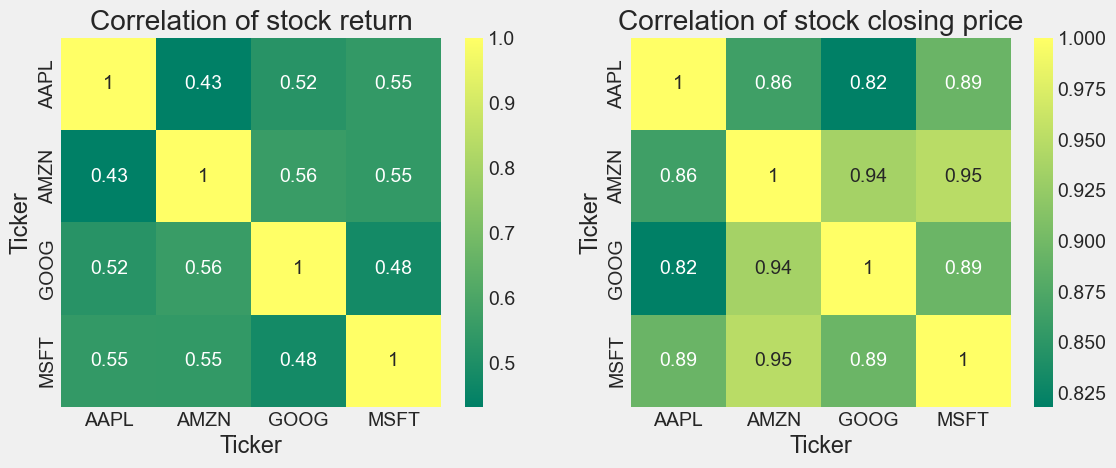

In [49]:
###### Son olarak, hisse senetlerinin günlük getiri değerleri arasındaki korelasyon için gerçek sayısal değerler 
###### elde etmek için bir korelasyon grafiği de yapabiliriz. Kapanış fiyatlarını karşılaştırarak, 
###### Microsoft ve Apple arasında ilginç bir ilişki görebiliriz
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

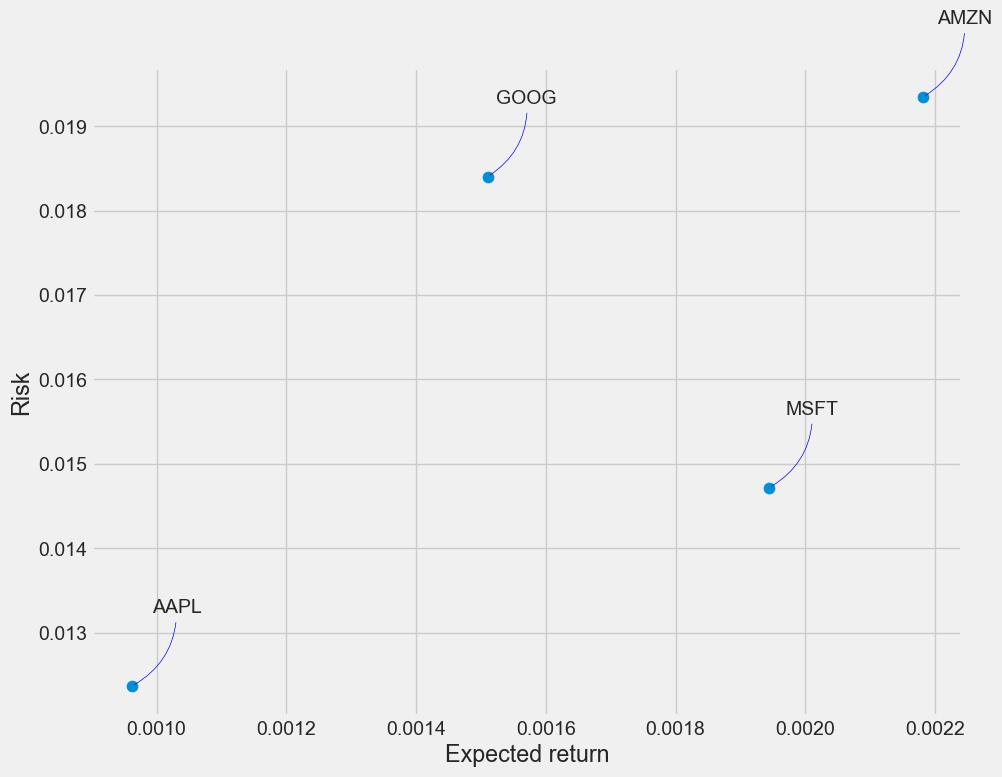

In [50]:
###### Belirli bir hisseye yatırım yaparak ne kadar risk aldığımızı ne kadar değer koyuyoruz?
###### Riski ölçmenin birçok yolu vardır, günlük yüzde getirilerle ilgili topladığımız bilgileri kullanmanın 
###### en temel yollarından biri, beklenen getiriyi günlük getirilerin standart sapmasıyla karşılaştırmaktır.
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [51]:
###### APPLE Inc.'in kapanış fiyatı hisse senedi fiyatını tahmin etme:
# Hisse senedi teklifini al.
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Verileri göster.
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449689,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516596,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655553,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787853,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767571,394024400
...,...,...,...,...,...,...
2024-01-31,187.039993,187.100006,184.350006,184.399994,184.399994,55467800
2024-02-01,183.990005,186.949997,183.820007,186.860001,186.860001,64885400
2024-02-02,179.860001,187.330002,179.250000,185.850006,185.850006,102518000


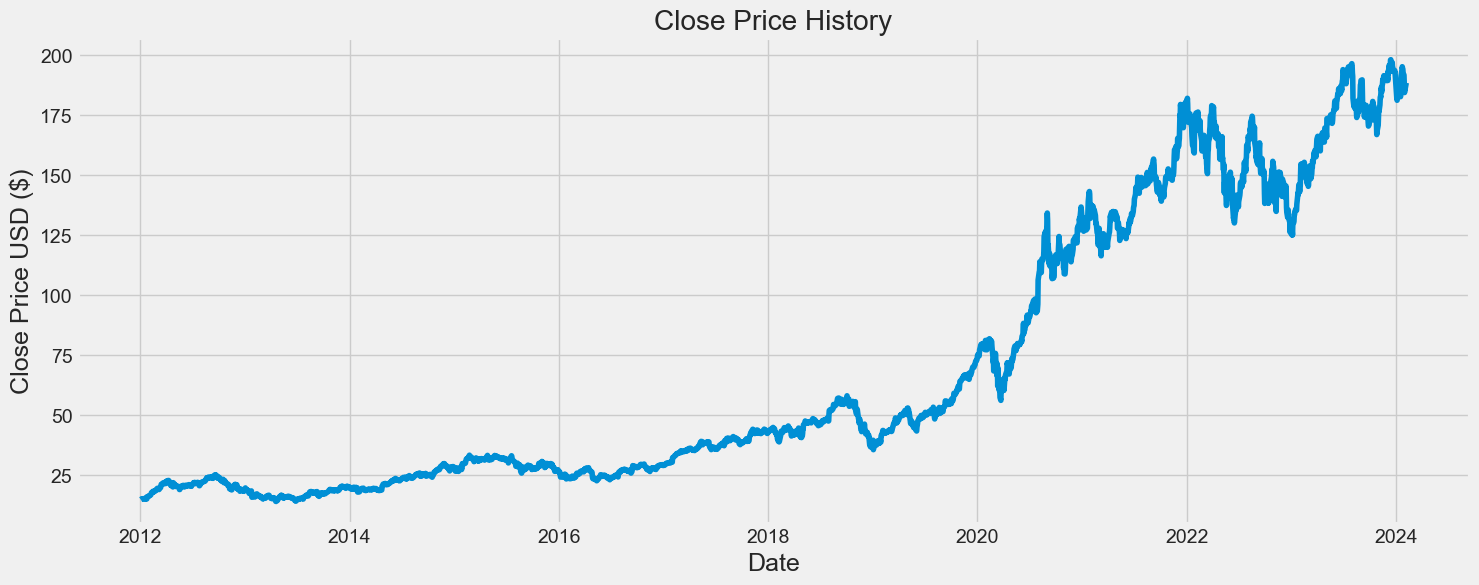

In [52]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [53]:
# Sadece 'Close' sütununu içeren yeni bir veri çerçevesi oluşturma. 
data = df.filter(['Close'])
# Veri çerçevesini bir numpy dizisine dönüştürme.
dataset = data.values
# Modeli eğitmek için kullanılacak satır sayısını alma.
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2891

In [54]:
# Verileri ölçeklendirme
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.93342839],
       [0.94336519],
       [0.9475463 ]])

In [55]:
# Eğitim veri setini oluşturma.
# Ölçeklenmiş eğitim veri setini oluşturma.
train_data = scaled_data[0:int(training_data_len), :]
# Veriyi x_train ve y_train veri setlerine ayırma.
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# x_train ve y_train'i numpy dizilerine dönüştürme.
x_train, y_train = np.array(x_train), np.array(y_train)

# Veriyi yeniden şekillendirme.
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape (şeklini al)

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [56]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# LSTM modelini oluşturma.
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Modeli derleme.
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme.
model.fit(x_train, y_train, batch_size=1, epochs=1)

2831/2831 [==============================] - 61s 20ms/step - loss: 0.0013


In [57]:
# Test veri setini oluşturma.
# İndeks 1543'ten 2002'ye kadar ölçeklenmiş değerleri içeren yeni bir dizi oluşturma. 
test_data = scaled_data[training_data_len - 60: , :]
# Veri setlerini x_test ve y_test olarak oluşturma.
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Veriyi bir numpy dizisine dönüştürme
x_test = np.array(x_test)

# Veriyi yeniden şekillendirme.
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Modelin tahmin edilen fiyat değerlerini alma. 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Kök Ortalama Kare Hatasını (RMSE) alma.
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 16ms/step


18.503078194945935

C:\Users\w10\AppData\Local\Temp\ipykernel_7872\3853825375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


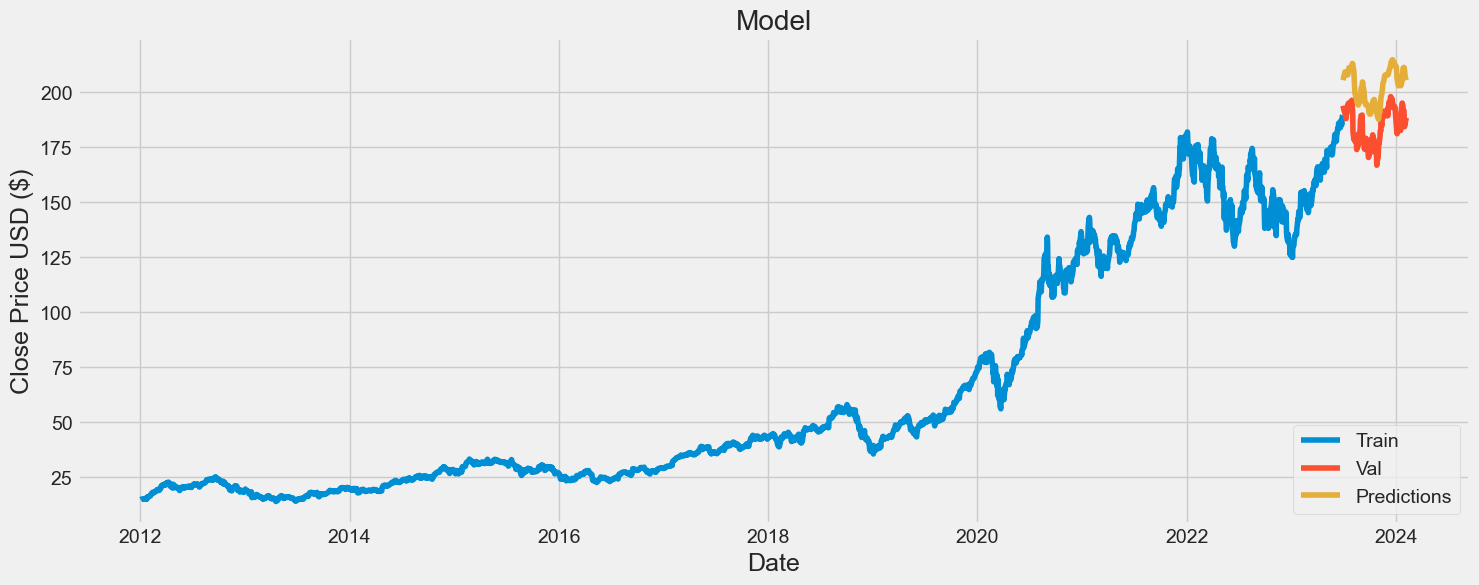

In [58]:
# Veriyi çizme
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Veriyi görselleştirme.
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [59]:
# Geçerli ve tahmin edilen fiyatları gösterme
valid

,Close,Predictions
Date,,
2023-06-30,193.970001,205.565445
2023-07-03,192.460007,207.033783
2023-07-05,191.330002,208.214310
2023-07-06,191.809998,208.884811
2023-07-07,190.679993,209.322372
...,...,...
2024-01-31,184.399994,210.224670
2024-02-01,186.860001,208.439453
2024-02-02,185.850006,207.115814
